# EDA

In [1]:
# Standard library
import zipfile
from pathlib import Path

# Third party
import kaggle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Authenticate to the Kaggle API for data download
kaggle.api.authenticate()

## 1. Data acquisition

### 1.2. Download

In [2]:
# Create target directory
Path('../data/raw').mkdir(parents=True, exist_ok=True)

# Download latest version
kaggle.api.dataset_download_files(
    'bhanupratapbiswas/superstore-sales',
    path='../data/raw/'
)

Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales


### 1.2. Extract

In [3]:
with zipfile.ZipFile('../data/raw/superstore-sales.zip', mode='r') as archive:
    archive.extract('superstore_final_dataset (1).csv', '../data/raw')

### 1.3. Inspect

In [4]:
data_df = pd.read_csv('../data/raw/superstore_final_dataset (1).csv', encoding='unicode_escape')
data_df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## 2. Feature selection

In [6]:
# Drop row ID
data_df.drop(columns=['Row_ID'], inplace=True)

### 2.1. Factor levels

In [7]:
categorical_features = ['Order_ID', 'Order_Date', 'Ship_Date','Ship_Mode','Customer_ID',
                        'Customer_Name', 'Segment', 'Country', 'City', 'State',
                        'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
                        'Product_Name']

data_df[categorical_features].nunique()

Order_ID         4922
Order_Date       1230
Ship_Date        1326
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
Country             1
City              529
State              49
Postal_Code       626
Region              4
Product_ID       1861
Category            3
Sub_Category       17
Product_Name     1849
dtype: int64

### 2.2. Additional drops

In [8]:
# Drop customer name - it's redundant to customer ID
data_df.drop(columns='Customer_Name', inplace=True)
categorical_features.remove('Customer_Name')
data_df[categorical_features].nunique()


Order_ID        4922
Order_Date      1230
Ship_Date       1326
Ship_Mode          4
Customer_ID      793
Segment            3
Country            1
City             529
State             49
Postal_Code      626
Region             4
Product_ID      1861
Category           3
Sub_Category      17
Product_Name    1849
dtype: int64

In [9]:
# Drop country - it's constant
data_df.drop(columns='Country', inplace=True)
categorical_features.remove('Country')
data_df[categorical_features].nunique()

Order_ID        4922
Order_Date      1230
Ship_Date       1326
Ship_Mode          4
Customer_ID      793
Segment            3
City             529
State             49
Postal_Code      626
Region             4
Product_ID      1861
Category           3
Sub_Category      17
Product_Name    1849
dtype: int64

In [10]:
# Drop product name - it's redundant to product ID
data_df.drop(columns='Product_Name', inplace=True)
categorical_features.remove('Product_Name')
data_df[categorical_features].nunique()

Order_ID        4922
Order_Date      1230
Ship_Date       1326
Ship_Mode          4
Customer_ID      793
Segment            3
City             529
State             49
Postal_Code      626
Region             4
Product_ID      1861
Category           3
Sub_Category      17
dtype: int64

## 3. Data preparation

**One-hot encoding** (low cardinality)
1. `Ship_Mode`
2. `Segment`
3. `Region`
4. `Category`

**Ordinal encoding** (high cardinality)
1. `Order_ID`
4. `Customer_ID`
5. `City`
6. `State`
7. `Postal_Code`
8. `Product_ID`
9. `Sub_Category`

### 3.1. Train-test split

In [11]:
train_df, test_df = train_test_split(data_df, test_size=0.3)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6860 entries, 3225 to 6837
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_ID      6860 non-null   object 
 1   Order_Date    6860 non-null   object 
 2   Ship_Date     6860 non-null   object 
 3   Ship_Mode     6860 non-null   object 
 4   Customer_ID   6860 non-null   object 
 5   Segment       6860 non-null   object 
 6   City          6860 non-null   object 
 7   State         6860 non-null   object 
 8   Postal_Code   6854 non-null   float64
 9   Region        6860 non-null   object 
 10  Product_ID    6860 non-null   object 
 11  Category      6860 non-null   object 
 12  Sub_Category  6860 non-null   object 
 13  Sales         6860 non-null   float64
dtypes: float64(2), object(12)
memory usage: 803.9+ KB


### 3.2. Ordinal encoding

In [12]:
low_cardinality_features = ['Ship_Mode', 'Segment', 'Region', 'Category']

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')

encoded_training_features = onehot_encoder.fit_transform(train_df[low_cardinality_features])
encoded_testing_features = onehot_encoder.transform(test_df[low_cardinality_features])

encoded_training_df = pd.DataFrame(
    encoded_training_features,
    columns=onehot_encoder.get_feature_names_out()
)

encoded_testing_df = pd.DataFrame(
    encoded_testing_features,
    columns=onehot_encoder.get_feature_names_out()
)

train_df.drop(columns=low_cardinality_features, inplace=True)
test_df.drop(columns=low_cardinality_features, inplace=True)

train_df = pd.concat([encoded_training_df.reset_index(drop=True), train_df.reset_index(drop=True)], axis=1)
test_df = pd.concat([encoded_testing_df.reset_index(drop=True), test_df.reset_index(drop=True)], axis=1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6860 entries, 0 to 6859
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ship_Mode_First Class     6860 non-null   float64
 1   Ship_Mode_Same Day        6860 non-null   float64
 2   Ship_Mode_Second Class    6860 non-null   float64
 3   Ship_Mode_Standard Class  6860 non-null   float64
 4   Segment_Consumer          6860 non-null   float64
 5   Segment_Corporate         6860 non-null   float64
 6   Segment_Home Office       6860 non-null   float64
 7   Region_Central            6860 non-null   float64
 8   Region_East               6860 non-null   float64
 9   Region_South              6860 non-null   float64
 10  Region_West               6860 non-null   float64
 11  Category_Furniture        6860 non-null   float64
 12  Category_Office Supplies  6860 non-null   float64
 13  Category_Technology       6860 non-null   float64
 14  Order_ID

### 3.3. One-hot encoding

In [13]:
high_cardinality_features = ['Order_ID','Customer_ID','City','State','Postal_Code','Product_ID','Sub_Category']

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train_df[high_cardinality_features] = ordinal_encoder.fit_transform(train_df[high_cardinality_features])
test_df[high_cardinality_features] = ordinal_encoder.transform(test_df[high_cardinality_features])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6860 entries, 0 to 6859
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ship_Mode_First Class     6860 non-null   float64
 1   Ship_Mode_Same Day        6860 non-null   float64
 2   Ship_Mode_Second Class    6860 non-null   float64
 3   Ship_Mode_Standard Class  6860 non-null   float64
 4   Segment_Consumer          6860 non-null   float64
 5   Segment_Corporate         6860 non-null   float64
 6   Segment_Home Office       6860 non-null   float64
 7   Region_Central            6860 non-null   float64
 8   Region_East               6860 non-null   float64
 9   Region_South              6860 non-null   float64
 10  Region_West               6860 non-null   float64
 11  Category_Furniture        6860 non-null   float64
 12  Category_Office Supplies  6860 non-null   float64
 13  Category_Technology       6860 non-null   float64
 14  Order_ID

In [14]:
train_df.head()

,Ship_Mode_First Class,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,...,Order_ID,Order_Date,Ship_Date,Customer_ID,City,State,Postal_Code,Product_ID,Sub_Category,Sales
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,86.0,2/10/2015,5/10/2015,278.0,451.0,1.0,471.0,877.0,7.0,12.768
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,416.0,28/12/2015,1/1/2016,36.0,38.0,19.0,6.0,425.0,1.0,1737.180
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1515.0,17/09/2017,22/09/2017,481.0,306.0,30.0,51.0,706.0,3.0,232.400
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2655.0,24/11/2018,27/11/2018,591.0,414.0,3.0,552.0,522.0,2.0,27.760
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1210.0,18/09/2016,24/09/2016,5.0,111.0,45.0,592.0,1097.0,12.0,18.540


### 3.4. Order date/ship date

In [15]:
train_df['Order_Date'] = pd.to_datetime(train_df['Order_Date'], format='%d/%m/%Y')
train_df['Ship_Date'] = pd.to_datetime(train_df['Ship_Date'], format='%d/%m/%Y')
test_df['Order_Date'] = pd.to_datetime(test_df['Order_Date'], format='%d/%m/%Y')
test_df['Ship_Date'] = pd.to_datetime(test_df['Ship_Date'], format='%d/%m/%Y')
train_df.head()

,Ship_Mode_First Class,Ship_Mode_Same Day,Ship_Mode_Second Class,Ship_Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,...,Order_ID,Order_Date,Ship_Date,Customer_ID,City,State,Postal_Code,Product_ID,Sub_Category,Sales
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,86.0,2015-10-02,2015-10-05,278.0,451.0,1.0,471.0,877.0,7.0,12.768
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,416.0,2015-12-28,2016-01-01,36.0,38.0,19.0,6.0,425.0,1.0,1737.180
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1515.0,2017-09-17,2017-09-22,481.0,306.0,30.0,51.0,706.0,3.0,232.400
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2655.0,2018-11-24,2018-11-27,591.0,414.0,3.0,552.0,522.0,2.0,27.760
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1210.0,2016-09-18,2016-09-24,5.0,111.0,45.0,592.0,1097.0,12.0,18.540


### 3.5. Postal code

We have some missing postal codes. Since we want to treat postal code like an ordinaly encoded feature - let's replace missing postal codes with -1. That way we don't loose them and we have a unique category for 'missing'.

In [16]:
train_df['Postal_Code'] = train_df['Postal_Code'].fillna(-1)
test_df['Postal_Code'] = test_df['Postal_Code'].fillna(-1)

## 4. Feature engineering

### 4.1. 'ship time'

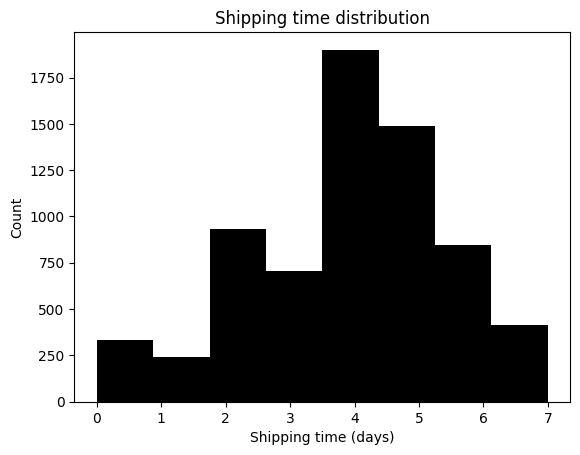

In [ ]:
train_df['ship_time'] = (train_df['Ship_Date'] - train_df['Order_Date']).dt.days
test_df['ship_time'] = (test_df['Ship_Date'] - train_df['Order_Date']).dt.days

plt.title('Shipping time distribution')
plt.hist(train_df['ship_time'], bins=8, color='black')
plt.xlabel('Shipping time (days)')
plt.ylabel('Count')
plt.show()